In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd


In [2]:
filename = 'fock_prep'
df = pd.read_csv(filename)
df

,task,layer,pulse_time,BO_fid,filenum
0,1,2,640,0.367880,0
1,1,3,972,0.735761,1
2,1,4,1216,0.981402,2
3,1,5,1388,0.998436,3
4,1,6,1876,0.999243,4
5,2,2,760,0.270671,5
6,2,3,1184,0.541341,6
7,2,4,1408,0.928658,7
8,2,5,1648,0.974011,8
9,2,6,1776,0.998754,9


In [6]:
def convert_complex_string_to_float(stringy):
    '''
    Convert '(a+0j)' to a where a,b are floats
    '''
    a = stringy.split('+')
    b = a[0].split('(')
    return float(b[1])
    
    

In [7]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'light',
        'size'   : 13}

matplotlib.rc('font', **font)

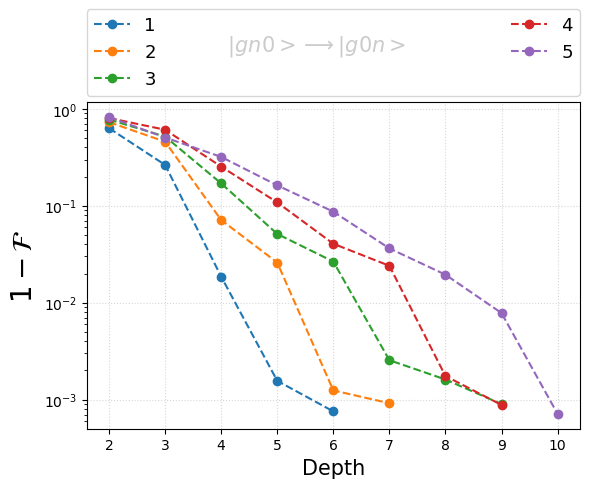

In [3]:
total_tasks = 5

fig = plt.figure(figsize = (6,5))

for i in range(1, total_tasks+1): 
    #each task
    
    #qutip fids
    #qutip_fids = list(df.loc[df['task'] ==i]['qutip_fid'])
    #qutip_fids = [1- convert_complex_string_to_float(i) for i in qutip_fids]
    bo_fids = list(df.loc[df['task'] ==i]['BO_fid'])
    bo_fids = [1-i for i in bo_fids]
    
    if len(bo_fids)==0:
        continue
    
    plt.plot(
        list(df.loc[df['task'] ==i]['layer']),
        bo_fids,
        marker = 'o', linestyle = '--' , label = str(i)      
        )
    #plt.plot(times, mean_buckets)

    
    #plt.errorbar(x, y, yerr = err, ecolor='black', capsize=10)#, label ='Line4')
#plt.text(8, 13, r'$|g>|n0> \rightarrow |g>|0n>$', fontsize = 15)
plt.grid(alpha=0.5, linestyle=':')

plt.xlabel('Depth', fontsize = 15)
#plt.hline(ecd_only)
plt.ylabel(r'$1 - \mathcal{F}$', fontsize = 20)
#plt.title('Beam Splitters', fontsize = 15)
plt.yscale('log')
#fig.savefig('Ancilla Relaxation')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0., fontsize = 13)
plt.text(4,4, ' $|gn0> \longrightarrow |g0n> $', fontsize = 15)
plt.tight_layout()

In [46]:
fig.savefig('state_transfer_depth.png', dpi = 1000)

# DUMP

<ipython-input-41-1fd1ac1e0e34>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(conditions, fontsize = 15)


([<matplotlib.axis.XTick at 0x1c0c7a19880>,
 [Text(0, 0, 'bo_fidelity'),
  Text(1, 0, 'only ecd'),
  Text(2, 0, 'bare qubit mode coupling'),
  Text(3, 0, 'stark shift'),
  Text(4, 0, 'mode coupling'),
  Text(5, 0, 'transmon relax'),
  Text(6, 0, 'transmon dephasing'),
  Text(7, 0, 'cavities relax'),
  Text(8, 0, 'cavities dephasing')])

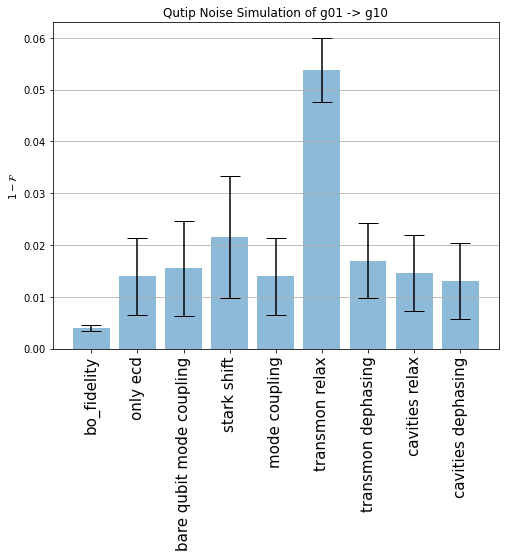

In [41]:
conditions = ['bo_fidelity', 'only ecd', 'bare qubit mode coupling','stark shift', 'mode coupling', 'transmon relax','transmon dephasing', 'cavities relax', 'cavities dephasing']
x_pos = np.arange(len(conditions))
bars = []
bars_err = []
for i in range(5):
    listy = list(df[conditions[i]]) 
    
    #if complex strings
    if type(listy[0]) is not float:
        listy = [convert_complex_string_to_float(i) for i in listy]
    bars.append(1 - np.mean(listy))
    bars_err.append(np.std(listy))
    
#master equation solver fidelity err -- returns density matrix instead of state
for i in range(5, len(conditions)):
    listy = list(df[conditions[i]]) 
    listy = [np.sqrt(i) for i in listy]
    bars.append(1 - np.mean(listy))
    bars_err.append(np.std(listy))

fig, ax = plt.subplots(figsize = (8,6))
ax.bar(conditions, bars, yerr=bars_err, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('$1-\mathcal{F}$')
#ax.set_xticks(x_pos)
ax.set_xticklabels(conditions, fontsize = 15)
ax.set_title('Qutip Noise Simulation of g01 -> g10')
ax.yaxis.grid(True)
plt.xticks(range(len(conditions)), conditions, rotation = 90)

In [4]:
#cond_labels =  ['Batch Optimizer', 'ECD Unitary Only', 'Dispersive ($\chi a^\dagger a \sigma_z $)',r'Stark Shift ($\chi |\alpha|^2  \sigma_z$)', 'Cross Kerr ($\chi_{ab} a^\dagger a b^\dagger b +...$)']

<ipython-input-42-b2b1d203bc20>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(conditions, fontsize = 15)


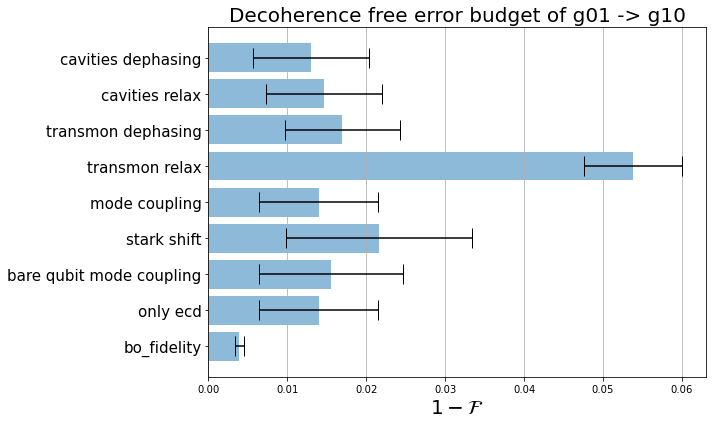

In [42]:
#conditions = ['bo_fidelity', 'only ecd', 'bare_qubit_mode_coupling','Stark Shift', 'Mode Coupling']#, 'transmon_relax','transmon_dephasing']
#x_pos = np.arange(len(conditions))
# bars = []
# bars_err = []
# for i in range(len(conditions)):
#     listy = list(df[conditions[i]]) 
#     if i is not 0:     # for all master eq sim, fidelity is squared bc of overlap issue
#         listy = [np.sqrt(i) for i in listy]
#     bars.append(1 - np.mean(listy))
#     bars_err.append(np.std(listy))
# conditions[-1] = "Mode-Mode Coupling"
fig, ax = plt.subplots(figsize = (10,6))
ax.barh(conditions, bars, xerr=bars_err, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_xlabel('$1-\mathcal{F}$', fontsize = 20)
#a#x.set_xticks(x_pos)
ax.set_yticklabels(conditions, fontsize = 15)
ax.set_title('Decoherence free error budget of g01 -> g10', fontsize = 20)
ax.xaxis.grid(True)
plt.yticks(range(len(conditions)), conditions)#, rotation = 60)
plt.tight_layout()
fig.savefig('Decoherence free error budget')
# colors = {'fruit':'red', 'veggie':'green'}         
# labels = list(colors.keys())

# handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
# plt.legend(handles, labels)

In [43]:
len(df)

19

<ipython-input-47-40c8d1f6f81d>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(conditions, fontsize = 15)


([<matplotlib.axis.XTick at 0x1c0c92008e0>,
 [Text(0, 0, 'only ecd'),
  Text(1, 0, 'bare qubit mode coupling'),
  Text(2, 0, 'stark shift'),
  Text(3, 0, 'mode coupling'),
  Text(4, 0, 'transmon relax'),
  Text(5, 0, 'transmon dephasing'),
  Text(6, 0, 'cavities relax'),
  Text(7, 0, 'cavities dephasing')])

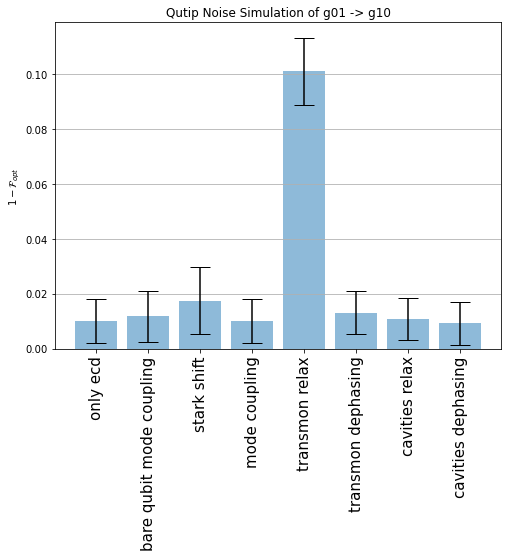

In [47]:
conditions = ['only ecd', 'bare qubit mode coupling','stark shift', 'mode coupling', 'transmon relax','transmon dephasing', 'cavities relax', 'cavities dephasing']
x_pos = np.arange(len(conditions))
bars = []
bars_err = []
for i in range(5):
    listy = list(df[conditions[i]]) 
    
    #if complex strings
    if type(listy[0]) is not float:
        listy = [convert_complex_string_to_float(i) for i in listy]
    listy = [df['bo_fidelity'][i] - listy[i] for i in range(1, len(df))]
    bars.append(np.mean(listy))
    bars_err.append(np.std(listy))
    
#master equation solver fidelity err -- returns density matrix instead of state
for i in range(5, len(conditions)):
    listy = list(df[conditions[i]]) 
    listy = [np.sqrt(i) for i in listy]
    listy = [df['bo_fidelity'][i] - listy[i] for i in range(1, len(df))]
    
    bars.append( np.mean(listy))
    bars_err.append(np.std(listy))

fig, ax = plt.subplots(figsize = (8,6))
ax.bar(conditions, bars, yerr=bars_err, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('$1-\mathcal{F}_{opt}$')
#ax.set_xticks(x_pos)
ax.set_xticklabels(conditions, fontsize = 15)
ax.set_title('Qutip Noise Simulation of g01 -> g10')
ax.yaxis.grid(True)
plt.xticks(range(len(conditions)), conditions, rotation = 90)

<ipython-input-51-0b90b348f77c>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(conditions, fontsize = 15)


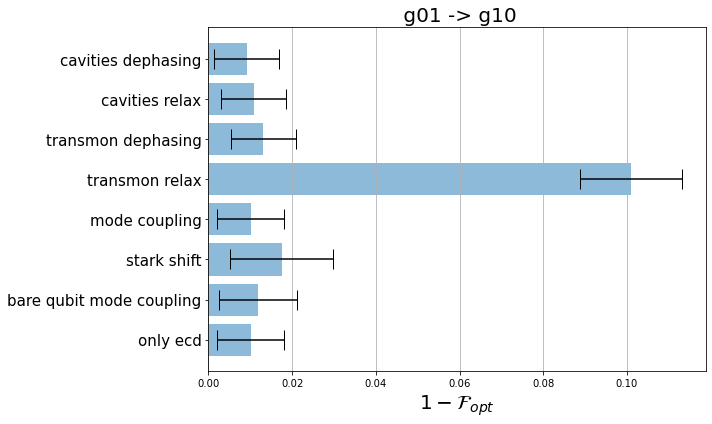

In [51]:
#conditions = ['bo_fidelity', 'only ecd', 'bare_qubit_mode_coupling','Stark Shift', 'Mode Coupling']#, 'transmon_relax','transmon_dephasing']
#x_pos = np.arange(len(conditions))
# bars = []
# bars_err = []
# for i in range(len(conditions)):
#     listy = list(df[conditions[i]]) 
#     if i is not 0:     # for all master eq sim, fidelity is squared bc of overlap issue
#         listy = [np.sqrt(i) for i in listy]
#     bars.append(1 - np.mean(listy))
#     bars_err.append(np.std(listy))
# conditions[-1] = "Mode-Mode Coupling"
fig, ax = plt.subplots(figsize = (10,6))
ax.barh(conditions, bars, xerr=bars_err, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_xlabel('$1-\mathcal{F}_{opt}$', fontsize = 20)
#a#x.set_xticks(x_pos)
ax.set_yticklabels(conditions, fontsize = 15)
ax.set_title(' g01 -> g10', fontsize = 20)
ax.xaxis.grid(True)
plt.yticks(range(len(conditions)), conditions)#, rotation = 60)
plt.tight_layout()
#fig.savefig('Decoherence free error budget')
# colors = {'fruit':'red', 'veggie':'green'}         
# labels = list(colors.keys())

# handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
# plt.legend(handles, labels)

In [39]:
bars

[0.003930486842105396,
 0.012743826073552844,
 0.012743826073552844,
 0.012743826073552844,
 0.012743826073552844,
 0.05380955290566136,
 0.01697431477013933,
 0.014635415758485149,
 0.013003884983335934]

# Transmon Relaxation

In [7]:
f2_name = 'Noise_sim_one_by_one__15_level_aug_11_transmon_relaxation'
df2 = pd.read_csv(f2_name)

In [8]:
df2 = df2.drop(0)

In [9]:
df2

,exact fidelity,bo_fidelity,betas,gammas,phis,thetas,"tramsmon_relaxation [50 us, 100 us, ...]"
1,0.995586,0.995598,[-0.00262321-0.00144306j 0.02715145-0.0185476...,[-0.22359522-4.9973166e-01j -0.7231863 +1.4162...,[ 0. 1.3961155 1.2453349 1.0953438 -...,[-1.5561874 2.275472 1.7466791 2.030403...,"[0.9267562768394095, 0.9462844598137663, 0.953..."
2,0.996460,0.996470,[-6.4737914e-04-3.2210814e-05j -5.2747920e-01+...,[ 5.0107450e-01+1.6034484e-02j -1.5052351e+00-...,[ 0. -1.5745307 -0.7655482 1.881175...,[ 1.5732338 -1.2030032 -3.1294155 3.1376164 -...,"[0.9289614632494338, 0.9534116201730521, 0.961..."
3,0.994936,0.995629,[ 1.0140339e-03+5.3937244e-04j -4.4833508e-04-...,[ 2.636092 +0.4190833j 0.01244382-0.432337j...,[ 0. -0.7320552 1.9630716 -2.370027 ...,[-0.0271492 1.5207536 -1.6562961 2.018657 -...,"[0.9240037826692744, 0.9489300381974358, 0.957..."
4,0.995886,0.995833,[ 6.5347767e-06-1.30088590e-04j 2.0591020e-03...,[-3.8990060e-01-3.9146677e-01j 5.7316244e-01-...,[ 0. -1.5533143 -1.5631359 -1.597816...,[ 1.5757606e+00 -1.1407130e+00 1.5744059e+00 ...,"[0.9198186245134586, 0.9475064562368978, 0.955..."
5,0.996191,0.996193,[ 6.5717466e-02+1.5812736j -1.1736141e-02+0.0...,[ 1.418391 +0.24241747j 0.33849597-0.9158984...,[ 0. 0.81113863 -2.1159046 -1.300121...,[ 3.136113 -1.5799026 0.99619174 0.772885...,"[0.9397597996954877, 0.9649460000035721, 0.973..."
6,0.996768,0.996779,[ 1.38473530e-03+1.6311259e-03j 1.09282150e+0...,[ 9.3426320e-02-4.8979080e-01j 3.3189622e-01+...,[ 0. 1.5340307 -2.4499028 -0.181198...,[ 1.5795605 -1.1847471 3.134495 1.818692...,"[0.927279695239411, 0.9540382168756641, 0.9629..."
7,0.996423,0.996423,[-0.02452667-2.7897577e-03j -0.00146851+1.7478...,[-3.7821588e-01-2.5588945e-01j -6.1016450e-01+...,[ 0. 1.5692036 1.5720084 -1.343168...,[-1.5716397 1.3233197 -2.0805616 0.003912...,"[0.9389781022086322, 0.9629217947161115, 0.971..."
8,0.996415,0.996425,[ 1.4479039e-03-4.1262887e-04j 3.3884450e-04-...,[-0.4419903 +0.3685562j -0.5735252 -0.605279j...,[ 0. 1.5909874 1.6046488 1.625607...,[-1.5605228 -2.0086124 -1.5044947 0.602578...,"[0.9425389499251368, 0.9675323008760628, 0.976..."
9,0.996539,0.996526,[ 0.01475754-0.04110372j 0.4100612 -0.2312351...,[-0.43818113+0.2351073j -2.1519425 +1.3530631...,[ 0. -1.567324 1.4665563 1.599829...,[-1.5563223 -1.123174 -0.00695944 -3.125749...,"[0.9127376311405143, 0.9348760290273798, 0.942..."
10,0.995410,0.995419,[-0.13434817-1.1718981j 0.06487343-0.0059511...,[ 0.3952284 +1.0193292j 0.39807162+0.1077477...,[ 0. -0.25606656 1.6486723 1.125031...,[-0.02907538 1.589442 1.7153823 1.757087...,"[0.9121931394141849, 0.9319784384001933, 0.938..."


In [10]:
c = 0
for i in range(12):
    inconsis =np.abs(ast.literal_eval(df2['tramsmon_relaxation [50 us, 100 us, ...]'][i+1])[-5] - df['only ecd'][i+1])
    print(inconsis)
    c+=float(inconsis)
print('err on average is ' + str(c/12))

NameError: name 'ast' is not defined

In [73]:
i = 0
df2['tramsmon_relaxation [50 us, 100 us, ...]'][i+1][-1]

']'

In [60]:
len(df2)

15

In [61]:
ecd_only = np.mean(df['only ecd'])
ecd_err = np.std(df['only ecd'])
ecd_err

0.012514970347797912

In [62]:
k = 1
j = 1
df2['tramsmon_relaxation [50 us, 100 us, ...]'][k+1]

'[0.9289614632494338, 0.9534116201730521, 0.96108742109826, 0.9652636222162979, 0.9680991866255065, 0.9692171434332351, 0.9694457841283055, 0.9712017654686547, 0.9716594393343652, 0.9734706857569317]'

In [17]:
import ast
buckets = [[] for _ in range(len(ast.literal_eval(df2['tramsmon_relaxation [50 us, 100 us, ...]'][1])))]
for j in range(len(buckets)):# for each time
    for k in range(len(df)):
        #print(k)
        listy = ast.literal_eval(df2['tramsmon_relaxation [50 us, 100 us, ...]'][k+1])
        listy = [np.sqrt(i) for i in listy]
        buckets[j].append(-1*(listy[j] - np.sqrt(df['only ecd'][k+1])))

        

In [18]:
mean_buckets = [np.mean(i) for i in buckets]
err_buckets = [np.std(i) for i in buckets]

In [19]:
times = [50 + 50*i for i in range(10)]

In [20]:
x = np.array(times)
y = np.array(mean_buckets)
err = np.array(err_buckets)

In [21]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'light',
        'size'   : 10}

matplotlib.rc('font', **font)

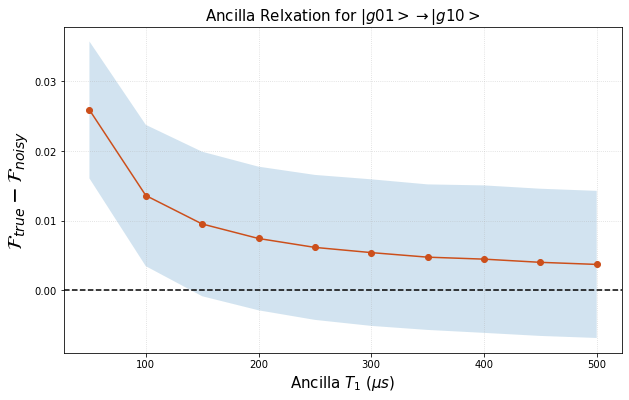

In [22]:
#plt.plot(times, mean_buckets)
fig = plt.figure(figsize = (10, 6))
#plt.errorbar(x, y, yerr = err, ecolor='black', capsize=10)#, label ='Line4')
plt.plot(x, y, 'k', marker = 'o', color='#CC4F1B')
plt.fill_between(x, y-err, y+err, alpha = 0.2)
plt.grid(alpha=0.5, linestyle=':')
plt.axhline(y=0, color='black', linestyle='--', label = 'No Noise')
plt.xlabel('Ancilla $T_1$ ($\mu s$)', fontsize = 15)
#plt.hline(ecd_only)
plt.ylabel(r'$\mathcal{F}_{true} - \mathcal{F}_{noisy}$', fontsize = 20)
plt.title(r'Ancilla Relxation for $|g01> \rightarrow |g10>$', fontsize = 15)
fig.savefig('Ancilla Relaxation')
#plt.legend()

In [36]:
y.shape()

AttributeError: 'list' object has no attribute 'shape'

In [34]:
#error = np.random.normal(0.1, 0.02, size=y.shape) +.1
y += np.random.normal(0, 0.1, size=y.shape)

pl.plot(x, y, 'k', color='#CC4F1B')
pl.fill_between(x, y-err, y+err,
    alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')

AttributeError: 'list' object has no attribute 'shape'